In [1]:
# auto-load when code changes outside
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0,'..')


In [2]:
import numpy as np
import streamlit as st
from copy import deepcopy as dc
import pandas as pd
from pathlib import Path
from src.label_checker_automata import LabelCheckerAutomata
from src.caption import Caption
import src.utils as utils

2023-06-09 09:53:44.262 INFO    numexpr.utils: Note: NumExpr detected 64 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2023-06-09 09:53:44.264 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


## Load data and all labels

In [8]:
data_dir = Path("../data/new/images")

labels = []
images_names = []

for image_fn in data_dir.iterdir():
    if image_fn.suffix == ".jpg":
        if image_fn.name.startswith("-1 "):
            labels.append("_".join(image_fn.stem.split("-1 ")[1:]))
        elif not image_fn.name.startswith("."):
                labels.append("_".join(image_fn.stem.split("_")[1:]))
        images_names.append(image_fn.name)
df = pd.DataFrame.from_dict({
    "label": labels,
     "images": images_names
})
df

,label,images
0,S AOGB 3 annulets & chief ch. lion isst & label,3805_S AOGB 3 annulets & chief ch. lion isst &...
1,G A cross potenty,29249_G A cross potenty.jpg
2,lion; lion q.f. {OS; BO},8134_ lion; lion q.f. {OS; BO}.jpg
3,O B lion rampant,19245_O B lion rampant.jpg
4,"fess; eagle doubleheaded; =; = {OS, SA}","12933_ fess; eagle doubleheaded; =; = {OS, SA..."
...,...,...
577,"cross; gonfanon; =; = {GA, AG}","30122_ cross; gonfanon; =; = {GA, AG}.jpg"
578,B A lion rampant,22050_B A lion rampant.jpg
579,A G eagle cr.,29454_A G eagle cr..jpg
580,G O lion rampant,22337_G O lion rampant.jpg


In [9]:
labels

['S AOGB 3 annulets & chief ch. lion isst & label',
 'G A cross potenty',
 ' lion; lion q.f.   {OS; BO}',
 'O B lion rampant',
 ' fess; eagle doubleheaded; =; =  {OS, SA}',
 'G A 3 lions',
 'B OO cross, crusily',
 'S A cross',
 'G AO lion passt guard acc. cross in chf',
 'O SS cross acc. orle of martlets',
 'O S 3 lions passt guard',
 'X SG OA per pale & eagle per pale',
 'X G BO barruly & lion',
 'O V lion cr.',
 'O SG lion & label',
 'A V lion rampant',
 'G AOB cross & bend compony br.',
 'A S 2 lions passt guard',
 'O S cross',
 'O S lion naissant',
 'B OO cross acc. 4 fire steels',
 'S  OG eagle boned trefly',
 ' nettle leaf; 2 lions passt guard, semy of hearts; =; =  {GA, OBG}',
 'G EO cross & chief',
 ' eagle doubleheaded; fess; =; =  {SA, OS}',
 'G AG eagle cr. trefly',
 'S XO AG cross checky & label',
 ' semy of fleurs-de-lis & border compony; lion; lion q.f. cr.; =   {BOAG, SO, AG}',
 ' cross; 2 lions passt guard; =; =   {GA, BA}',
 'G O lion cr.',
 'O G cross betw. 4 fleur-de

In [10]:
images_names

['3805_S AOGB 3 annulets & chief ch. lion isst & label.jpg',
 '29249_G A cross potenty.jpg',
 '8134_ lion; lion q.f.   {OS; BO}.jpg',
 '19245_O B lion rampant.jpg',
 '12933_ fess; eagle doubleheaded; =; =  {OS, SA}.jpg',
 '22611_G A 3 lions.jpg',
 '2685_B OO cross, crusily.jpg',
 '7788_S A cross.jpg',
 '20814_G AO lion passt guard acc. cross in chf.jpg',
 '21953_O SS cross acc. orle of martlets.jpg',
 '9516_O S 3 lions passt guard.jpg',
 '21805_X SG OA per pale & eagle per pale.jpg',
 '4869_X G BO barruly & lion.jpg',
 '22854_O V lion cr..jpg',
 '1800_O SG lion & label.jpg',
 '7350_A V lion rampant.jpg',
 '22968_G AOB cross & bend compony br..jpg',
 '2737_A S 2 lions passt guard.jpg',
 '5855_O S cross.jpg',
 '-1_O S lion naissant.jpg',
 '27097_B OO cross acc. 4 fire steels.jpg',
 '30137_S  OG eagle boned trefly.jpg',
 '20550_ nettle leaf; 2 lions passt guard, semy of hearts; =; =  {GA, OBG}.jpg',
 '22612_G EO cross & chief.jpg',
 '10791_ eagle doubleheaded; fess; =; =  {SA, OS}.jpg',
 

## Create plural full captions

In [25]:
from src.armoria_api_generator_helper import ArmoriaAPIGeneratorHelper


columns  = 'image,caption'
folder_name = '/home/salnabulsi/coat-of-arms/data/new/'
caption_file = folder_name + 'full-captions.txt'

armoriaHelper = ArmoriaAPIGeneratorHelper(caption_file, folder_name, labels)


In [15]:
armoriaHelper.creat_caption_file(caption_file, columns)

In [16]:
armoriaHelper.generate_cropped_caption_file_out(images_names)    

ValueError (not raised): label "S AOGB 3 annulets & chief ch. lion isst & label" cannot be parsed. The chunk "label" cannot be fit into any category.
ValueError (not raised): label "lion; lion q.f.   {OS; BO}" cannot be parsed. The chunk "lion;" cannot be fit into any category.
ValueError (not raised): label "lion; lion q.f.   {OS; BO}" cannot be parsed. The chunk "q.f." cannot be fit into any category.
ValueError (not raised): label "lion; lion q.f.   {OS; BO}" cannot be parsed. The chunk "{OS;" cannot be fit into any category.
ValueError (not raised): label "lion; lion q.f.   {OS; BO}" cannot be parsed. The chunk "BO}" cannot be fit into any category.
No shield color found in this label: "lion; lion q.f.   {OS; BO}"
line:  19245_O B lion rampant.jpg O B lion rampant
ValueError (not raised): label "fess; eagle doubleheaded; =; =  {OS, SA}" cannot be parsed. The chunk "fess;" cannot be fit into any category.
ValueError (not raised): label "fess; eagle doubleheaded; =; =  {OS, SA}" cann

line:  3837_A S lion rampant.jpg A S lion rampant
line:  17923_B O lion rampant.jpg B O lion rampant
line:  -1_S O 2 lions passt guard.jpg S O 2 lions passt guard
ValueError (not raised): label "talbot collared; per pale eagle isst & lion isst; =; =  {OS, ABAG}" cannot be parsed. The chunk "talbot" cannot be fit into any category.
ValueError (not raised): label "talbot collared; per pale eagle isst & lion isst; =; =  {OS, ABAG}" cannot be parsed. The chunk "collared;" cannot be fit into any category.
ValueError (not raised): label "talbot collared; per pale eagle isst & lion isst; =; =  {OS, ABAG}" cannot be parsed. The chunk "per" cannot be fit into any category.
ValueError (not raised): label "talbot collared; per pale eagle isst & lion isst; =; =  {OS, ABAG}" cannot be parsed. The chunk "isst;" cannot be fit into any category.
ValueError (not raised): label "talbot collared; per pale eagle isst & lion isst; =; =  {OS, ABAG}" cannot be parsed. The chunk "=;" cannot be fit into any ca

ValueError (not raised): label "S OA lion cr. holding book" cannot be parsed. The chunk "holding" cannot be fit into any category.
ValueError (not raised): label "S OA lion cr. holding book" cannot be parsed. The chunk "book" cannot be fit into any category.
ValueError (not raised): label "X GO GO per pale & lion guard cch & chief ch. 3 fleurs-de-lis" cannot be parsed. The chunk "per" cannot be fit into any category.
Caption Class - exception in label X GO GO per pale & lion guard cch & chief ch. 3 fleurs-de-lis, ['&', 'cch', '&']
line:  5114_B O 3 eagles.jpg B O 3 eagles
ValueError (not raised): label "G A lion rampant billety" cannot be parsed. The chunk "billety" cannot be fit into any category.
line:  9460_G A lion rampant billety.jpg G A lion rampant billety
line:  586_S O lion rampant.jpg S O lion rampant
ValueError (not raised): label "X BO AG per pale lozengy & lion" cannot be parsed. The chunk "per" cannot be fit into any category.
ValueError (not raised): label "X BO AG per p

ValueError (not raised): label "A SO eagle biting crescent inv." cannot be parsed. The chunk "biting" cannot be fit into any category.
ValueError (not raised): label "A SO eagle biting crescent inv." cannot be parsed. The chunk "inv." cannot be fit into any category.
ValueError (not raised): label "A GOS per pale eagle isst & barry" cannot be parsed. The chunk "per" cannot be fit into any category.
ValueError (not raised): label "A GOS per pale eagle isst & barry" cannot be parsed. The chunk "barry" cannot be fit into any category.
ValueError (not raised): label "lion; lion q.f.; =; = :E: chevronny  {OS, AG, AG}" cannot be parsed. The chunk "lion;" cannot be fit into any category.
ValueError (not raised): label "lion; lion q.f.; =; = :E: chevronny  {OS, AG, AG}" cannot be parsed. The chunk "q.f.;" cannot be fit into any category.
ValueError (not raised): label "lion; lion q.f.; =; = :E: chevronny  {OS, AG, AG}" cannot be parsed. The chunk "=;" cannot be fit into any category.
ValueErro

line:  7830_O G eagle doubleheaded.jpg O G eagle doubleheaded
line:  18825_O S eagle doubleheaded.jpg O S eagle doubleheaded
ValueError (not raised): label "bend betw 6 flowers; 3 lions passt guard; =; =   {BOAG, OB}" cannot be parsed. The chunk "flowers;" cannot be fit into any category.
ValueError (not raised): label "bend betw 6 flowers; 3 lions passt guard; =; =   {BOAG, OB}" cannot be parsed. The chunk "guard;" cannot be fit into any category.
ValueError (not raised): label "bend betw 6 flowers; 3 lions passt guard; =; =   {BOAG, OB}" cannot be parsed. The chunk "=;" cannot be fit into any category.
ValueError (not raised): label "bend betw 6 flowers; 3 lions passt guard; =; =   {BOAG, OB}" cannot be parsed. The chunk "=" cannot be fit into any category.
ValueError (not raised): label "bend betw 6 flowers; 3 lions passt guard; =; =   {BOAG, OB}" cannot be parsed. The chunk "{BOAG," cannot be fit into any category.
ValueError (not raised): label "bend betw 6 flowers; 3 lions passt 

line:  16446_A G 2 lions passt guard cr..jpg A G 2 lions passt guard cr.
ValueError (not raised): label "G OO lion, billety" cannot be parsed. The chunk "lion," cannot be fit into any category.
ValueError (not raised): label "G OO lion, billety" cannot be parsed. The chunk "billety" cannot be fit into any category.
ValueError (not raised): label "cross; fess; =; =   {AS, OS}" cannot be parsed. The chunk "cross;" cannot be fit into any category.
ValueError (not raised): label "cross; fess; =; =   {AS, OS}" cannot be parsed. The chunk "fess;" cannot be fit into any category.
ValueError (not raised): label "cross; fess; =; =   {AS, OS}" cannot be parsed. The chunk "=;" cannot be fit into any category.
ValueError (not raised): label "cross; fess; =; =   {AS, OS}" cannot be parsed. The chunk "=" cannot be fit into any category.
ValueError (not raised): label "cross; fess; =; =   {AS, OS}" cannot be parsed. The chunk "{AS," cannot be fit into any category.
ValueError (not raised): label "cro

### calcualte pixels for the resized images 

In [26]:
captions_psumsq_file  = folder_name + '/full_captions_psumsq.txt'


In [27]:
armoriaHelper.creat_caption_file(captions_psumsq_file, columns='image,caption,psum,psum_sq')

In [28]:
armoriaHelper.add_pixels_column(folder_name, captions_psumsq_file, caption_file, start_index=0, images_folder = 'resized')

In [29]:
captions_psumsq_file  = folder_name + '/full_captions_psumsq-original.txt'


In [30]:
armoriaHelper.creat_caption_file(captions_psumsq_file, columns='image,caption,psum,psum_sq')

In [31]:
armoriaHelper.add_pixels_column(folder_name, captions_psumsq_file, caption_file, start_index=0, images_folder = 'images')

# Duplicates in labels: Histogram of labels

In [25]:
def plot_bar_chart(data):
    labels, values = zip(*data)
    indexes = np.arange(len(labels))
    width = 0.5

    plt.rcParams["figure.figsize"] = (20, 10)
    plt.bar(indexes, values, width)
    plt.xticks(indexes, labels, rotation='vertical', fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()


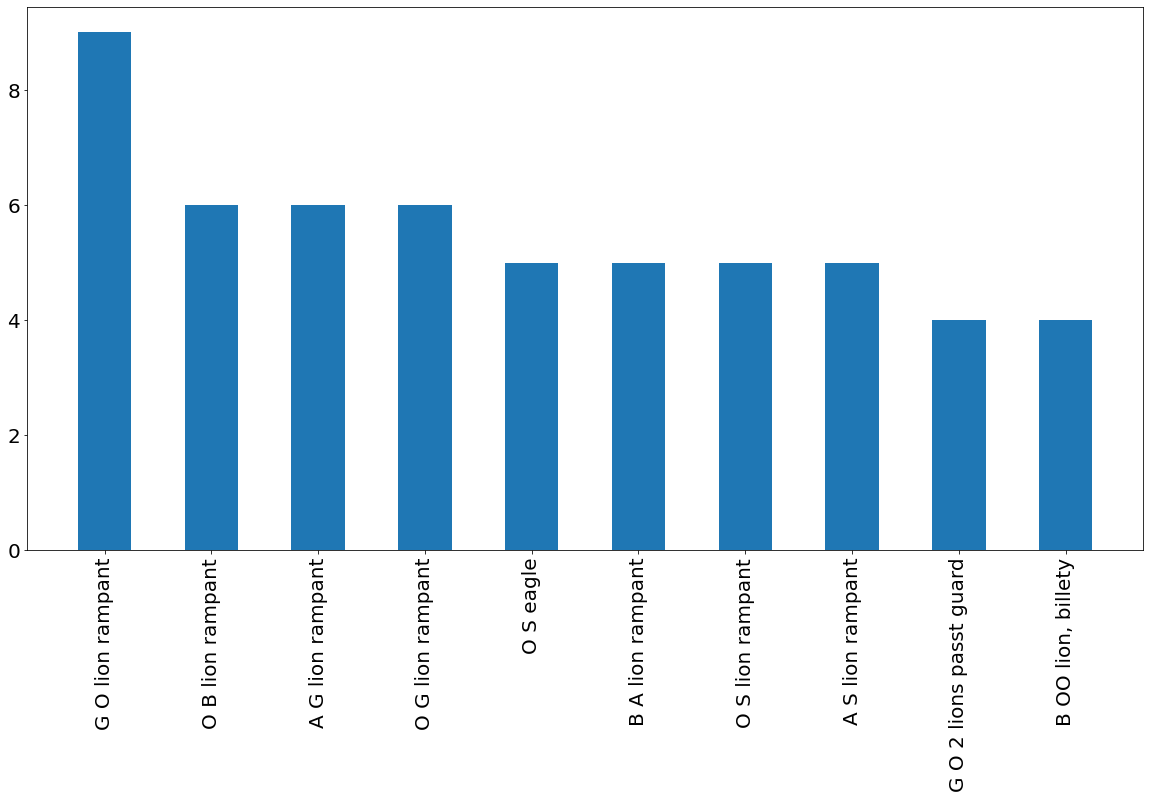

455

In [34]:
import matplotlib.pyplot as plt
from collections import Counter

x = Counter(labels)
plot_bar_chart(x.most_common(10))
# x.most_common(20)
len(x)

In [36]:
elems, count = np.unique(labels, return_counts=True)
output = []
counter=0
for l, n in zip(elems, count):
    if n > 1:
        print(f'{n} : "{l}"')
        counter+=1


2 : " 3 fleurs-de-lis; 3 lions passt guard; =; = :: book  {BO, GO; A}"
2 : " castle; lion; =; =  {GO, AP}"
2 : "A B lion cr."
3 : "A B lion rampant"
2 : "A G 3 eagles"
2 : "A G 3 lions"
3 : "A G cross"
4 : "A G cross moline"
3 : "A G eagle"
2 : "A G eagle doubleheaded"
3 : "A G lion cr."
2 : "A G lion q.f. cr."
6 : "A G lion rampant"
2 : "A GO cross ch. 5 escallops"
2 : "A GOS per pale eagle isst & barry"
2 : "A S 2 lions passt guard"
2 : "A S cross"
2 : "A S eagle"
2 : "A S lion cr."
5 : "A S lion rampant"
2 : "A V lion rampant"
2 : "B A cross"
4 : "B A lion cr."
5 : "B A lion rampant"
2 : "B O 3 eagles"
4 : "B O eagle"
2 : "B O eagle cr."
2 : "B O lion cr."
3 : "B O lion rampant"
4 : "B OO lion, billety"
2 : "G A 3 lions"
3 : "G A cross"
4 : "G A eagle"
2 : "G A eagle cr."
2 : "G A eagle doubleheaded"
3 : "G A lion rampant"
2 : "G AA lion, billety"
2 : "G E lion rampant"
4 : "G O 2 lions passt guard"
4 : "G O eagle"
2 : "G O eagle doubleheaded"
2 : "G O lion cr."
9 : "G O lion rampan

In [37]:
count.sum()

582

In [38]:
print(f'There are {counter} repeated labels out of {len(elems)} total labels')

There are 67 repeated labels out of 455 total labels


In [39]:
import re

voc = []
for label in labels:
    ws = re.findall(r'\w+', label)
    for w in ws:
        voc.append(w)
len(voc), len(set(voc))

(3366, 323)

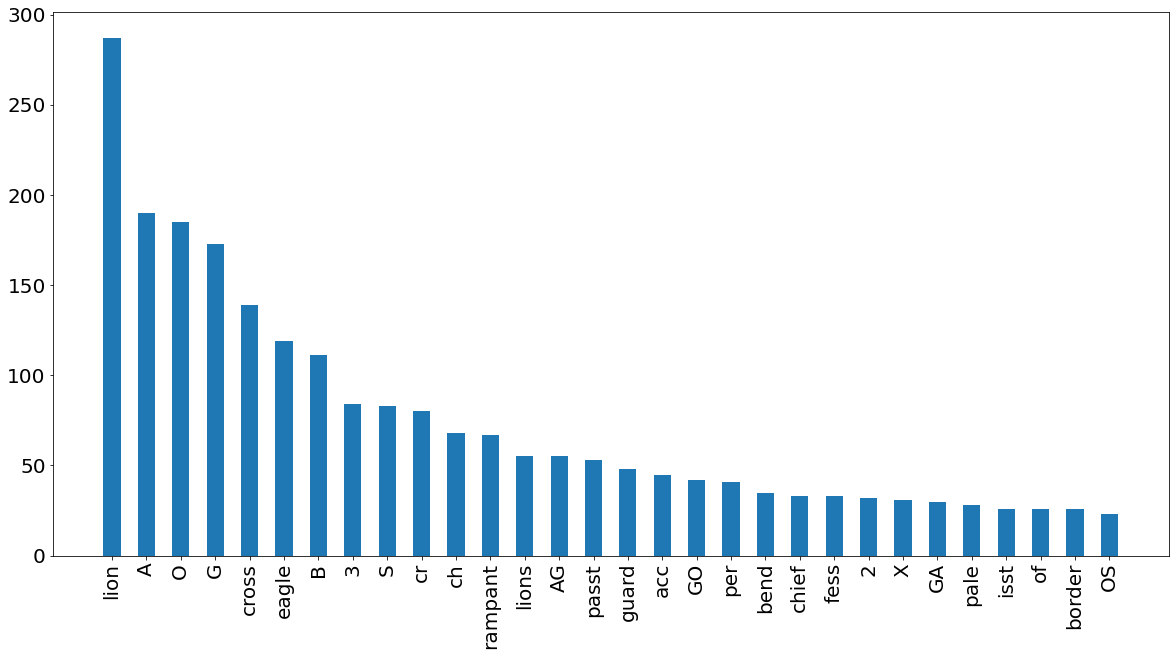

[('lion', 287),
 ('A', 190),
 ('O', 185),
 ('G', 173),
 ('cross', 139),
 ('eagle', 119),
 ('B', 111),
 ('3', 84),
 ('S', 83),
 ('cr', 80),
 ('ch', 68),
 ('rampant', 67),
 ('lions', 55),
 ('AG', 55),
 ('passt', 53),
 ('guard', 48),
 ('acc', 45),
 ('GO', 42),
 ('per', 41),
 ('bend', 35),
 ('chief', 33),
 ('fess', 33),
 ('2', 32),
 ('X', 31),
 ('GA', 30),
 ('pale', 28),
 ('isst', 26),
 ('of', 26),
 ('border', 26),
 ('OS', 23)]

In [40]:

y = Counter(voc)
plot_bar_chart(y.most_common(30))
y.most_common(30)

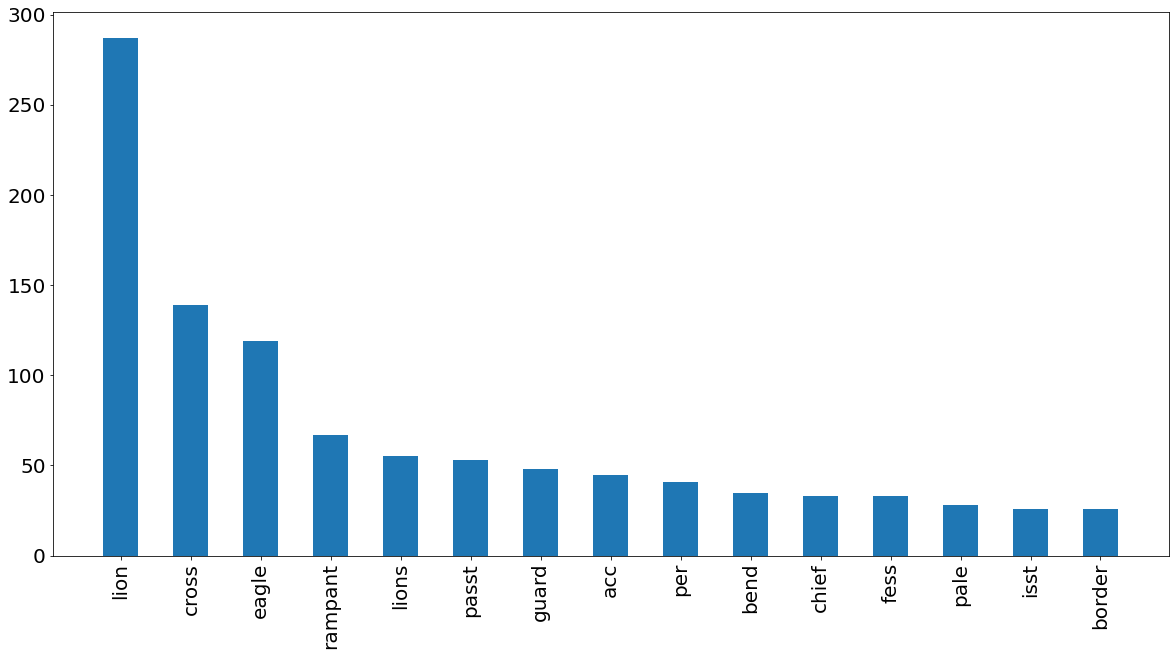

[('lion', 287),
 ('cross', 139),
 ('eagle', 119),
 ('rampant', 67),
 ('lions', 55),
 ('passt', 53),
 ('guard', 48),
 ('acc', 45),
 ('per', 41),
 ('bend', 35),
 ('chief', 33),
 ('fess', 33),
 ('pale', 28),
 ('isst', 26),
 ('border', 26)]

In [44]:
cleaned_vocabularies_without_color = [l for l in voc if len(l)>2]

y = Counter(cleaned_vocabularies_without_color)
plot_bar_chart(y.most_common(15))
y.most_common(15)

## Check the folder and see. Many images for the same label however they are different. 
## There are wrong labeled data in the ground truth! :( 
It's visible via streamlit tool .. 

## Check if the labels match our simple automata 

In [13]:
captions_val = []
captions_val_armoria = []
for l in labels:
    c = Caption(l, support_plural=False)
    if c.is_valid:
        captions_val.append(l)
    if c.is_valid_in_armoria:
        captions_val_armoria.append(l)

print(f'Total number of valid labels in our automata {len(captions_val)} out of {len(labels)}' )
print(f'Total number of valid labels in our automata and Armoria API {len(captions_val_armoria)} out of {len(labels)}' )

# Total number of valid labels in our automata 907 out of 3065
# Total number of valid labels in our automata and Armoria API 271 out of 3065

# NEW DATA
#Total number of valid labels in our automata 316 out of 582
#Total number of valid labels in our automata and Armoria API 193 out of 582



ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "lion;" cannot be fit into any category.
ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "maunch" cannot be fit into any category.
ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "fisted" cannot be fit into any category.
ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "holding" cannot be fit into any category.
ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "annulet," cannot be fit into any category.
ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "crusily;" cannot be fit into any category.


ValueError (not raised): label " sun on mount; 3 lion passt guard; =; =   {BOS, OS}" cannot be parsed. The chunk "mount;" cannot be fit into any category.
ValueError (not raised): label " sun on mount; 3 lion passt guard; =; =   {BOS, OS}" cannot be parsed. The chunk "guard;" cannot be fit into any category.
ValueError (not raised): label " sun on mount; 3 lion passt guard; =; =   {BOS, OS}" cannot be parsed. The chunk "=;" cannot be fit into any category.
ValueError (not raised): label " sun on mount; 3 lion passt guard; =; =   {BOS, OS}" cannot be parsed. The chunk "=" cannot be fit into any category.
ValueError (not raised): label " sun on mount; 3 lion passt guard; =; =   {BOS, OS}" cannot be parsed. The chunk "{BOS," cannot be fit into any category.
ValueError (not raised): label " sun on mount; 3 lion passt guard; =; =   {BOS, OS}" cannot be parsed. The chunk "OS}" cannot be fit into any category.
No shield color found in this label: " sun on mount; 3 lion passt guard; =; =   {BO

## Check if the labels match our plural automata 

In [14]:
captions_val = []
captions_val_armoria = []
for l in labels:
    c = Caption(l, support_plural=True)
    if c.is_valid:
        captions_val.append(l)
    if c.is_valid_in_armoria:
        captions_val_armoria.append(l)

print(f'Total number of valid labels in our automata {len(captions_val)} out of {len(labels)}' )
print(f'Total number of valid labels in our automata and Armoria API {len(captions_val_armoria)} out of {len(labels)}' )

# Total number of valid labels in our automata 1273 out of 3065
# Total number of valid labels in our automata and Armoria API 271 out of 3065

# NEW DATA
# Total number of valid labels in our automata 382 out of 582
# Total number of valid labels in our automata and Armoria API 193 out of 582


ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "lion;" cannot be fit into any category.
ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "maunch" cannot be fit into any category.
ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "fisted" cannot be fit into any category.
ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "holding" cannot be fit into any category.
ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "annulet," cannot be fit into any category.
ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "crusily;" cannot be fit into any category.


ValueError (not raised): label "S  OG eagle boned trefly" cannot be parsed. The chunk "boned" cannot be fit into any category.
ValueError (not raised): label "S  OG eagle boned trefly" cannot be parsed. The chunk "trefly" cannot be fit into any category.
ValueError (not raised): label " eagle ch. crescent; mounted knight holding scimitar; =; =   {GA, GA}" cannot be parsed. The chunk "crescent;" cannot be fit into any category.
ValueError (not raised): label " eagle ch. crescent; mounted knight holding scimitar; =; =   {GA, GA}" cannot be parsed. The chunk "mounted" cannot be fit into any category.
ValueError (not raised): label " eagle ch. crescent; mounted knight holding scimitar; =; =   {GA, GA}" cannot be parsed. The chunk "knight" cannot be fit into any category.
ValueError (not raised): label " eagle ch. crescent; mounted knight holding scimitar; =; =   {GA, GA}" cannot be parsed. The chunk "holding" cannot be fit into any category.
ValueError (not raised): label " eagle ch. cresc

## Double check again via automata directly

In [15]:
automata = LabelCheckerAutomata(support_plural=False)
validated_labels = automata.get_valid_labels(labels)

ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "lion;" cannot be fit into any category.
ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "maunch" cannot be fit into any category.
ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "fisted" cannot be fit into any category.
ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "holding" cannot be fit into any category.
ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "annulet," cannot be fit into any category.
ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "crusily;" cannot be fit into any category.


In [16]:
total = len(labels)
valid = len(validated_labels)
print('Total number of labels', total)
print('Valid labels', valid)
print('Invalid labels', total - valid)

Total number of labels 582
Valid labels 316
Invalid labels 266


In [18]:
captions = [ Caption(l, support_plural=False) for l in labels ]
print(len(captions))


582


In [19]:
valid = [ 1 for c in captions if c.is_valid ]
sum(valid)
# 316

ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "lion;" cannot be fit into any category.
ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "maunch" cannot be fit into any category.
ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "fisted" cannot be fit into any category.
ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "holding" cannot be fit into any category.
ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "annulet," cannot be fit into any category.
ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "crusily;" cannot be fit into any category.


316

# get simple valid labels with lion

In [20]:
simple_automata = LabelCheckerAutomata(support_plural=False)
lion_labels = simple_automata.get_valid_labels_of(labels, 'lion')
print(len(lion_labels))
lion_labels
# 163

ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "lion;" cannot be fit into any category.
ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "maunch" cannot be fit into any category.
ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "fisted" cannot be fit into any category.
ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "holding" cannot be fit into any category.
ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "annulet," cannot be fit into any category.
ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "crusily;" cannot be fit into any category.


['O S lion rampant',
 'O B lion rampant',
 'G O lion passt guard',
 'A SG lion holding trunk',
 'O GS lion cr. & border engrailed',
 "A GV lion and eagle's claw winged sn",
 'A G lion rampant',
 'B A lion rampant',
 'O G lion q.f.',
 'B AG chief ch. lion q.f.',
 'O G lion rampant',
 'A B lion rampant',
 'B X AG lion barruly cr.',
 'B A lion cr.',
 'O B lion rampant',
 'A B lion rampant',
 'O GV lion naissant above mount',
 'B A lion cr.',
 'S OA lion acc. bend',
 'G A lion q.f.',
 'B O lion rampant',
 'E G lion',
 'G O lion guard q.f.',
 'B O lion cr.',
 'G O lion rampant',
 'A GB lion & border engrailed',
 'A G lion cr.',
 'B A lion rampant',
 'G X AS lion checky cr.',
 'B AG lion naissant above mount',
 'G A lion rampant',
 'O X GB lion hooded',
 'A P lion cr.',
 'A G lion rampant',
 'O GO lion guard ch. cross',
 'O B lion cr.',
 'A GO lion stat on mount',
 'G Z lion rampant',
 'A G lion rampant',
 'O GA lion acc. sword per bend',
 'B A lion rampant',
 'B X GA lion barruly cr.',
 'O 

In [21]:
plural_automata = LabelCheckerAutomata(support_plural=True)
lion_labels_p = plural_automata.get_valid_labels_of(labels, 'lion')
print(len(lion_labels_p))
lion_labels_p 
# 208

ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "lion;" cannot be fit into any category.
ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "maunch" cannot be fit into any category.
ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "fisted" cannot be fit into any category.
ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "holding" cannot be fit into any category.
ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "annulet," cannot be fit into any category.
ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "crusily;" cannot be fit into any category.


['O S lion rampant',
 'O B lion rampant',
 'G O lion passt guard',
 'A G 2 lions rampant addorsed',
 'A SG lion holding trunk',
 'O GS lion cr. & border engrailed',
 "A GV lion and eagle's claw winged sn",
 'A G lion rampant',
 'O B 3 lions passt cr.',
 'B A lion rampant',
 'G O 3 lions',
 'O G lion q.f.',
 'B AG chief ch. lion q.f.',
 'O G lion rampant',
 'A B lion rampant',
 'B X AG lion barruly cr.',
 'B A lion cr.',
 'O S 3 lions',
 'O B lion rampant',
 "G OO chevron betw 3 lion's heads",
 'A B lion rampant',
 'O GV lion naissant above mount',
 'B A lion cr.',
 'S OA lion acc. bend',
 'G A lion q.f.',
 'B O lion rampant',
 'E G lion',
 'S O 2 lions passt guard',
 'G O lion guard q.f.',
 'O B 3 lions',
 'B O lion cr.',
 'G O lion rampant',
 'O S 3 lions passt guard',
 'A GB lion & border engrailed',
 'A G lion cr.',
 'B A lion rampant',
 'A XG AB 3 bars compony & lion',
 'G X AS lion checky cr.',
 'B AG lion naissant above mount',
 'O S 3 lions',
 'B A 3 lions cr.',
 'G A lion rampa

# get simple valid labels with cross

In [22]:
cross_labels = plural_automata.get_valid_labels_of(labels, 'cross')


ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "lion;" cannot be fit into any category.
ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "maunch" cannot be fit into any category.
ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "fisted" cannot be fit into any category.
ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "holding" cannot be fit into any category.
ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "annulet," cannot be fit into any category.
ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "crusily;" cannot be fit into any category.


In [23]:
print(len(cross_labels))
cross_labels

94


['G A cross',
 'A G cross patonce',
 'B O cross engrailed',
 'O BB cross patonce acc. 4 martlets',
 'O G cross engrailed',
 'O G cross',
 'B O cross',
 'A G cross',
 'E G cross moline',
 'O SA cross fretty',
 'B OGO cross ch. 5 escallops, crusily',
 'B O cross potenty',
 'O A cross botonny',
 'A G cross engrailed',
 'G AA escutcheon acc. orle of cross crosslets',
 'O G cross fleuretty',
 'G Z cross moline',
 "A S+ cross ch. escutch {Ar boar's head Sa}",
 'B AO cross and crozier sn',
 'A G cross moline',
 'O G cross moline',
 'B AG cross ch. 5 crescents',
 'A X SO cross lozengy',
 'A G 5 lozenges per cross',
 'S A cross patonce',
 'A G cross moline',
 'V A cross',
 'A S cross',
 'O GO lion guard ch. cross',
 'O G cross',
 'B A cross',
 'G EO cross & chief',
 'X G BA per fess & cross couped',
 'G E cross',
 'A B cross',
 'O SA eagle ch. crescent with cross',
 'O X AG cross checky',
 'A B cross moline',
 'O V cross',
 'G A cross potenty',
 'O G cross',
 'G O cross moline',
 'O SS cross ac

# get simple valid labels with eagle

In [24]:
eagle_labels = plural_automata.get_valid_labels_of(labels, 'eagle')


ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "lion;" cannot be fit into any category.
ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "maunch" cannot be fit into any category.
ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "fisted" cannot be fit into any category.
ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "holding" cannot be fit into any category.
ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "annulet," cannot be fit into any category.
ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "crusily;" cannot be fit into any category.


In [25]:
print(len(eagle_labels))
eagle_labels
#93

93


['S A eagle',
 'G O 3 eagles',
 'G O eagle',
 'G AO eagle & border',
 "A GV lion and eagle's claw winged sn",
 'B X AG eagle checky cr.',
 'O GZ eagle & border',
 'A G eagle cr.',
 'G A eagle cr.',
 'B A eagle',
 'G A eagle doubleheaded',
 'B O eagle',
 'A G eagle doubleheaded',
 'B O eagle',
 'S A eagle doubleheaded',
 'O S eagle doubleheaded',
 'O S eagle',
 'A G eagle',
 'A S eagle',
 'B O eagle cr.',
 'A B eagle doubleheaded',
 'G O eagle doubleheaded',
 'G A eagle',
 'O S eagle per fess',
 'A GO eagle ch. crescent',
 'O S 2 eagles in pale',
 'A X BG eagle per pale',
 'V O eagle',
 'G O eagle',
 'A S eagle',
 'O SA eagle ch. crescent',
 'O SA eagle ch. crescent with cross',
 'A SO eagle biting crescent inv.',
 'B A 3 eagles',
 'E G eagle',
 'G A eagle',
 'B O 3 eagles',
 'A BB fess betw 4 eagles',
 'G AS chief ch. eagle isst',
 'O S eagle',
 'A GO eagle cr. boned trefly',
 'A GX AB eagle & border nebuly',
 'B O eagle',
 'O SX AG eagle acc. bend checky',
 'B G eagle',
 'A SG eagle d

In [26]:
elabels = simple_automata.get_valid_labels_of(labels, 'per pale')


ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "lion;" cannot be fit into any category.
ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "maunch" cannot be fit into any category.
ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "fisted" cannot be fit into any category.
ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "holding" cannot be fit into any category.
ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "annulet," cannot be fit into any category.
ValueError (not raised): label " lion; maunch fisted holding annulet, crusily; =; =  {AS, GAO}" cannot be parsed. The chunk "crusily;" cannot be fit into any category.


In [27]:
print(len(elabels))
elabels

1


['A X BG eagle per pale']